Mount Folder Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library Yang dibutuhkan

In [ ]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Convert Image ke Array

In [ ]:
def imgToarray(filename):
  image=cv2.imread(filename)
  img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image_array = np.array(img_gray)
  image_array = image_array/255

  list_full=[]

  for singel_list in image_array:
    list_full.extend(singel_list)


  return np.array(list_full)

Insert Data to DataFrame

In [ ]:
dataf = '/content/drive/MyDrive/Colab Notebooks/Letter Dataset'
fol = os.listdir(dataf)
folder = sorted(fol)
data = []
label = []
nama = []
x = 1
for folname in folder:
  path = os.path.join(dataf,folname)
  img = os.listdir(path)
  for imname in img:
    impath = os.path.join(path,imname)
    data.append(imgToarray(impath))
    nama.append(folname)
    label.append(x)
  x += 1


tab={'label':label,'nama':nama,'data':data}
df = pd.DataFrame(tab)
df

,label,nama,data
0,1,0,"[0.6784313725490196, 0.6784313725490196, 0.678..."
1,1,0,"[0.5529411764705883, 0.5529411764705883, 0.552..."
2,1,0,"[0.5490196078431373, 0.5529411764705883, 0.556..."
3,1,0,"[0.5450980392156862, 0.5254901960784314, 0.509..."
4,1,0,"[0.7215686274509804, 0.7215686274509804, 0.721..."
...,...,...,...
345,35,Z,"[0.6901960784313725, 0.6862745098039216, 0.682..."
346,35,Z,"[0.6235294117647059, 0.615686274509804, 0.6470..."
347,35,Z,"[0.7215686274509804, 0.6784313725490196, 0.752..."
348,35,Z,"[0.6509803921568628, 0.6509803921568628, 0.654..."


Lookup Label & Split Data

In [ ]:
lookup_plat = dict(zip(df.label.unique(), df.nama.unique()))

X = data
y = label

# split 80% data 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=1)
print('X_train = ', X_train)
print('X_test = ', X_test)
print('y_train = ', y_train)
print('y_test = ', y_test)

X_train =  [array([0.7254902 , 0.7254902 , 0.72156863, ..., 0.76078431, 0.76078431,
       0.76078431]), array([0.47843137, 0.47843137, 0.47843137, ..., 0.85098039, 0.85098039,
       0.85098039]), array([0.7254902 , 0.7254902 , 0.7254902 , ..., 0.69803922, 0.69803922,
       0.69803922]), array([0.64705882, 0.64705882, 0.64705882, ..., 0.64705882, 0.64705882,
       0.64705882]), array([0.41960784, 0.41960784, 0.41960784, ..., 0.74901961, 0.74901961,
       0.74901961]), array([0.42745098, 0.41960784, 0.39607843, ..., 0.59607843, 0.59607843,
       0.59607843]), array([0.76078431, 0.84313725, 0.87058824, ..., 0.06666667, 0.2745098 ,
       0.56470588]), array([0.60392157, 0.60392157, 0.60392157, ..., 0.63137255, 0.63137255,
       0.63137255]), array([0.55294118, 0.55294118, 0.55294118, ..., 0.55686275, 0.55686275,
       0.55686275]), array([0.58823529, 0.58823529, 0.58823529, ..., 0.58823529, 0.58823529,
       0.58823529]), array([0.78823529, 0.78823529, 0.78823529, ..., 0.85098039

Training KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
# Latih pengklasifikasi menggunakan data latih
knn.fit(X_train, y_train)
print("accuracy:",knn.score(X_test, y_test))

accuracy: 0.9


Thresholding dan Grayscale

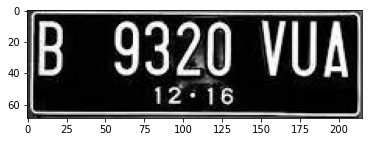

In [ ]:
img = cv2.imread('/content/plat.jpg',0) #Imread Grayscale
plt.imshow(img,cmap=plt.cm.gray)
ret, img_threshold = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
invert = cv2.bitwise_not(img_threshold)

Cropping Image

In [ ]:
#Membuat Fungsi Cropping
def cropping(img,xl_diff,xr_diff,yb_diff,yt_diff): #Kiri, Kanan, Atas, Bawah
  xl = xl_diff
  xr = img.shape[1] - xr_diff
  yb = yb_diff
  yt = img.shape[0] - yt_diff
  return img[yb:yt,xl:xr]

#Cropping Setiap Huruf
B   =cropping(invert,9,193,8,28)
SB  =cropping(invert,57,143,8,28)
TG  =cropping(invert,77,125,8,28)
DA  =cropping(invert,97,105,8,28)
NL  =cropping(invert,116,84,8,28)
V   =cropping(invert,151,49,8,28)
U   =cropping(invert,170,29,7,28)
A   =cropping(invert,191,9,8,27)
ST  =cropping(invert,82,130,49,9)
DB  =cropping(invert,91,116,48,8)
SST =cropping(invert,116,96,50,9)
EB  =cropping(invert,125,83,50,9)

#plotting dalam 1 Figure
rows = 2
columns = 6
image=[B,SB,TG,DA,NL,V,U,A,ST,DB,SST,EB]

segmentation_spacing = 0.9

#Split tiap karakter
white = []  # Menyimpan jumlah piksel putih di setiap kolom
black = []  # Menyimpan jumlah piksel hitam di setiap kolom
height = img_threshold.shape[0]
width = img_threshold.shape[1]

white_max = 0
black_max = 0


#memisahkan melalui jumlah piksel hitam dan putih untuk setiap kolom
for i in range(width):
    white_count = 0
    black_count = 0
    for j in range(height):
        if img_threshold[j][i] == 255:
            white_count += 1
        else:
            black_count += 1

    white.append(white_count)
    black.append(black_count)

white_max = max(white)
black_max = max(black)
x = 0
for i in range(len(image)):
  cv2.imwrite(f'/content/drive/MyDrive/Colab Notebooks/Plat/gambar{x+1}.jpg',image[i])
  x += 1

Testing Prediksi salah 1 Huruf

Gambar tersebut merupakan karakter= 0


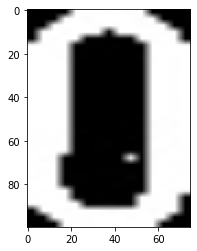

In [ ]:
point = (75,100)
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Plat/gambar5.jpg')
resized = cv2.resize(image, point, interpolation= cv2.INTER_LINEAR)


img_gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
imarr = np.array(img_gray)
imarr = imarr/255
gambar_2=imarr.reshape(1,-1)

plt.imshow(img_gray,cmap='gray')

prediksi = knn.predict(gambar_2)
prediksi_2=lookup_plat[prediksi[0]-1]
print("Gambar tersebut merupakan karakter=",prediksi_2)